<a href="https://colab.research.google.com/github/carolinirufino/Telecom_X_2/blob/main/TelecomX_2_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carregamento de bibliotecas e base de dados**

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/carolinirufino/Telecom_X_2/refs/heads/main/TelecomX_Data_Processed.csv')

df.head()

ID_Cliente  Rotatividade Sexo_Cliente  Cliente_Idoso  Cliente_Parceiro  \
0  0002-ORFBO             0     feminino              0                 1   
1  0003-MKNFE             0    masculino              0                 0   
2  0004-TLHLJ             1    masculino              0                 0   
3  0011-IGKFF             1    masculino              1                 1   
4  0013-EXCHZ             1     feminino              1                 1   

   Cliente_Dependentes  Tempo_Servico  Servico_Telefone  Multiplas_Linhas  \
0                    1              9                 1               0.0   
1                    0              9                 1               1.0   
2                    0              4                 1               0.0   
3                    0             13                 1               0.0   
4                    0              3                 1               0.0   

  Servico_Internet  ...  Protecao_Dispositivo  Suporte_Tecnico  Streaming_TV  \
0              dsl  ...                   0.0              1.0           1.0   
1              dsl  ...                   0.0              0.0           0.0   
2     fibra √≥ptica  ...                   1.0              0.0           0.0   
3     fibra √≥ptica  ...                   1.0              0.0           1.0   
4     fibra √≥ptica  ...                   0.0              1.0           1.0   

   Streaming_Filmes  Contrato_Conta  Conta_Digital   Metodo_Pagamento  \
0               0.0           anual              1     cheque enviado   
1               1.0          mensal              0     cheque enviado   
2               0.0          mensal              1  cheque eletr√¥nico   
3               1.0          mensal              1  cheque eletr√¥nico   
4               0.0          mensal              1     cheque enviado   

   Encargos_Mensais Encargos_Totais  Contas_Diarias  
0              65.6          593.30        2.186667  
1              59.9          542.40        1.996667  
2              73.9          280.85        2.463333  
3              98.0         1237.85        3.266667  
4              83.9          267.40        2.796667  

[5 rows x 22 columns]

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Rotatividade          7267 non-null   int64  
 2   Sexo_Cliente          7267 non-null   object 
 3   Cliente_Idoso         7267 non-null   int64  
 4   Cliente_Parceiro      7267 non-null   int64  
 5   Cliente_Dependentes   7267 non-null   int64  
 6   Tempo_Servico         7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   int64  
 8   Multiplas_Linhas      7267 non-null   float64
 9   Servico_Internet      7267 non-null   object 
 10  Seguranca_Online      7267 non-null   float64
 11  Backup_Online         7267 non-null   float64
 12  Protecao_Dispositivo  7267 non-null   float64
 13  Suporte_Tecnico       7267 non-null   float64
 14  Streaming_TV          7267 non-null   float64
 15  Streaming_Filmes     

**Limpeza Inicial dos Dados**

In [159]:
# Remover colunas in√∫teis:
df.drop(columns=['ID_Cliente'], inplace=True)

In [160]:
# Verificar tipos de dados (object, int, float):
df.dtypes

Rotatividade              int64
Sexo_Cliente             object
Cliente_Idoso             int64
Cliente_Parceiro          int64
Cliente_Dependentes       int64
Tempo_Servico             int64
Servico_Telefone          int64
Multiplas_Linhas        float64
Servico_Internet         object
Seguranca_Online        float64
Backup_Online           float64
Protecao_Dispositivo    float64
Suporte_Tecnico         float64
Streaming_TV            float64
Streaming_Filmes        float64
Contrato_Conta           object
Conta_Digital             int64
Metodo_Pagamento         object
Encargos_Mensais        float64
Encargos_Totais         float64
Contas_Diarias          float64
dtype: object

In [161]:
# Verificar valores √∫nicos nas colunas categ√≥ricas:
variaveis_categoricas = ['Sexo_Cliente', 'Servico_Internet', 'Contrato_Conta', 'Metodo_Pagamento']

for col in variaveis_categoricas:
    print(f"{col}:\n{df[col].value_counts()}\n")

Sexo_Cliente:
Sexo_Cliente
masculino    3675
feminino     3592
Name: count, dtype: int64

Servico_Internet:
Servico_Internet
fibra √≥ptica    3198
dsl             2488
nenhum          1581
Name: count, dtype: int64

Contrato_Conta:
Contrato_Conta
mensal    4005
bienal    1743
anual     1519
Name: count, dtype: int64

Metodo_Pagamento:
Metodo_Pagamento
cheque eletr√¥nico         2445
cheque enviado            1665
transfer√™ncia banc√°ria    1589
cart√£o de cr√©dito         1568
Name: count, dtype: int64



In [162]:
df.columns

Index(['Rotatividade', 'Sexo_Cliente', 'Cliente_Idoso', 'Cliente_Parceiro',
       'Cliente_Dependentes', 'Tempo_Servico', 'Servico_Telefone',
       'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Contrato_Conta', 'Conta_Digital',
       'Metodo_Pagamento', 'Encargos_Mensais', 'Encargos_Totais',
       'Contas_Diarias'],
      dtype='object')

In [163]:
df.head()

Rotatividade Sexo_Cliente  Cliente_Idoso  Cliente_Parceiro  \
0             0     feminino              0                 1   
1             0    masculino              0                 0   
2             1    masculino              0                 0   
3             1    masculino              1                 1   
4             1     feminino              1                 1   

   Cliente_Dependentes  Tempo_Servico  Servico_Telefone  Multiplas_Linhas  \
0                    1              9                 1               0.0   
1                    0              9                 1               1.0   
2                    0              4                 1               0.0   
3                    0             13                 1               0.0   
4                    0              3                 1               0.0   

  Servico_Internet  Seguranca_Online  ...  Protecao_Dispositivo  \
0              dsl               0.0  ...                   0.0   
1              dsl               0.0  ...                   0.0   
2     fibra √≥ptica               0.0  ...                   1.0   
3     fibra √≥ptica               0.0  ...                   1.0   
4     fibra √≥ptica               0.0  ...                   0.0   

   Suporte_Tecnico  Streaming_TV  Streaming_Filmes  Contrato_Conta  \
0              1.0           1.0               0.0           anual   
1              0.0           0.0               1.0          mensal   
2              0.0           0.0               0.0          mensal   
3              0.0           1.0               1.0          mensal   
4              1.0           1.0               0.0          mensal   

  Conta_Digital   Metodo_Pagamento Encargos_Mensais  Encargos_Totais  \
0             1     cheque enviado             65.6           593.30   
1             0     cheque enviado             59.9           542.40   
2             1  cheque eletr√¥nico             73.9           280.85   
3             1  cheque eletr√¥nico             98.0          1237.85   
4             1     cheque enviado             83.9           267.40   

   Contas_Diarias  
0        2.186667  
1        1.996667  
2        2.463333  
3        3.266667  
4        2.796667  

[5 rows x 21 columns]

**Encoding das vari√°veis categ√≥ricas**

In [164]:
variaveis_categoricas = [
    'Sexo_Cliente',
    'Servico_Internet',
    'Contrato_Conta',
    'Metodo_Pagamento'
]

In [165]:
df = pd.get_dummies(df, columns=variaveis_categoricas, drop_first=True)
df = df.astype(int)
df

Rotatividade  Cliente_Idoso  Cliente_Parceiro  Cliente_Dependentes  \
0                0              0                 1                    1   
1                0              0                 0                    0   
2                1              0                 0                    0   
3                1              1                 1                    0   
4                1              1                 1                    0   
...            ...            ...               ...                  ...   
7262             0              0                 0                    0   
7263             1              0                 1                    0   
7264             0              0                 0                    0   
7265             0              0                 1                    1   
7266             0              0                 1                    1   

      Tempo_Servico  Servico_Telefone  Multiplas_Linhas  Seguranca_Online  \
0                 9                 1                 0                 0   
1                 9                 1                 1                 0   
2                 4                 1                 0                 0   
3                13                 1                 0                 0   
4                 3                 1                 0                 0   
...             ...               ...               ...               ...   
7262             13                 1                 0                 1   
7263             22                 1                 1                 0   
7264              2                 1                 0                 0   
7265             67                 1                 0                 1   
7266             63                 0                 0                 1   

      Backup_Online  Protecao_Dispositivo  ...  Encargos_Totais  \
0                 1                     0  ...              593   
1                 0                     0  ...              542   
2                 0                     1  ...              280   
3                 1                     1  ...             1237   
4                 0                     0  ...              267   
...             ...                   ...  ...              ...   
7262              0                     0  ...              742   
7263              0                     0  ...             1873   
7264              1                     0  ...               92   
7265              0                     1  ...             4627   
7266              1                     1  ...             3707   

      Contas_Diarias  Sexo_Cliente_masculino  Servico_Internet_fibra √≥ptica  \
0                  2                       0                              0   
1                  1                       1                              0   
2                  2                       1                              1   
3                  3                       1                              1   
4                  2                       0                              1   
...              ...                     ...                            ...   
7262               1                       0                              0   
7263               2                       1                              1   
7264               1                       1                              0   
7265               2                       1                              0   
7266               1                       1                              0   

      Servico_Internet_nenhum  Contrato_Conta_bienal  Contrato_Conta_mensal  \
0                           0                      0                      0   
1                           0                      0                      1   
2                           0                      0                      1   
3                           0                      0                      1   
4                 

**Verifica√ß√£o da Propor√ß√£o de Evas√£o**

In [166]:
# Contagem das classes
contagem = df['Rotatividade'].value_counts()

ativos = contagem.get(0, 0)
evadidos = contagem.get(1, 0)

proporcao = evadidos / ativos if ativos != 0 else None

print(f"Clientes ativos: {ativos}")
print(f"Clientes evadidos: {evadidos}")
print(f"Propor√ß√£o (evadidos / ativos): {proporcao:.4f}")

# Avalia√ß√£o simples do desequil√≠brio
if proporcao is not None:
    if proporcao < 0.2:
        print("‚ö†Ô∏è Aten√ß√£o: Classes desbalanceadas ‚Äî poucos evadidos comparado com ativos.")
    else:
        print("‚úîÔ∏è Classes relativamente balanceadas.")
else:
    print("Erro: N√£o foi poss√≠vel calcular a propor√ß√£o (divis√£o por zero).")


Clientes ativos: 5398
Clientes evadidos: 1869
Propor√ß√£o (evadidos / ativos): 0.3462
‚úîÔ∏è Classes relativamente balanceadas.


**An√°lise de Correla√ß√£o**

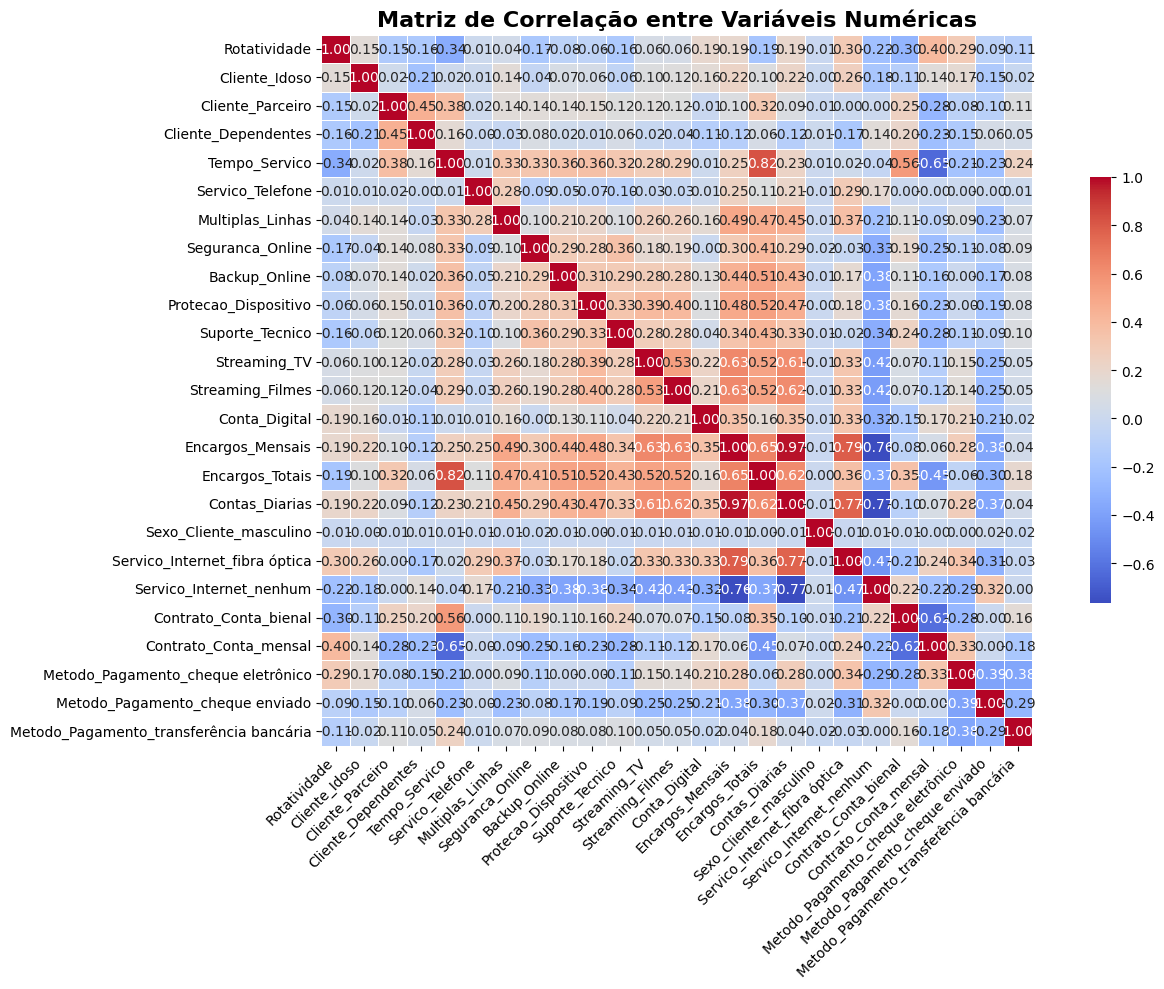

In [167]:
df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))

sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f', square=True,
            linewidths=.5, cbar_kws={"shrink": .6})

plt.title('Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [168]:
# Correla√ß√£o de cada vari√°vel com 'Rotatividade', ordenadas:
correlacoes_com_churn = df_corr['Rotatividade'].drop('Rotatividade').sort_values(key=abs, ascending=False)

print("üîç Vari√°veis mais correlacionadas com a evas√£o:")
print(correlacoes_com_churn)

üîç Vari√°veis mais correlacionadas com a evas√£o:
Contrato_Conta_mensal                      0.395584
Tempo_Servico                             -0.344079
Servico_Internet_fibra √≥ptica              0.300949
Contrato_Conta_bienal                     -0.295138
Metodo_Pagamento_cheque eletr√¥nico         0.294626
Servico_Internet_nenhum                   -0.224051
Encargos_Totais                           -0.194018
Contas_Diarias                             0.192562
Encargos_Mensais                           0.189907
Conta_Digital                              0.186666
Seguranca_Online                          -0.166828
Cliente_Dependentes                       -0.161384
Suporte_Tecnico                           -0.160440
Cliente_Parceiro                          -0.148546
Cliente_Idoso                              0.146733
Metodo_Pagamento_transfer√™ncia banc√°ria   -0.114767
Metodo_Pagamento_cheque enviado           -0.090061
Backup_Online                             -0.080163
Protecao

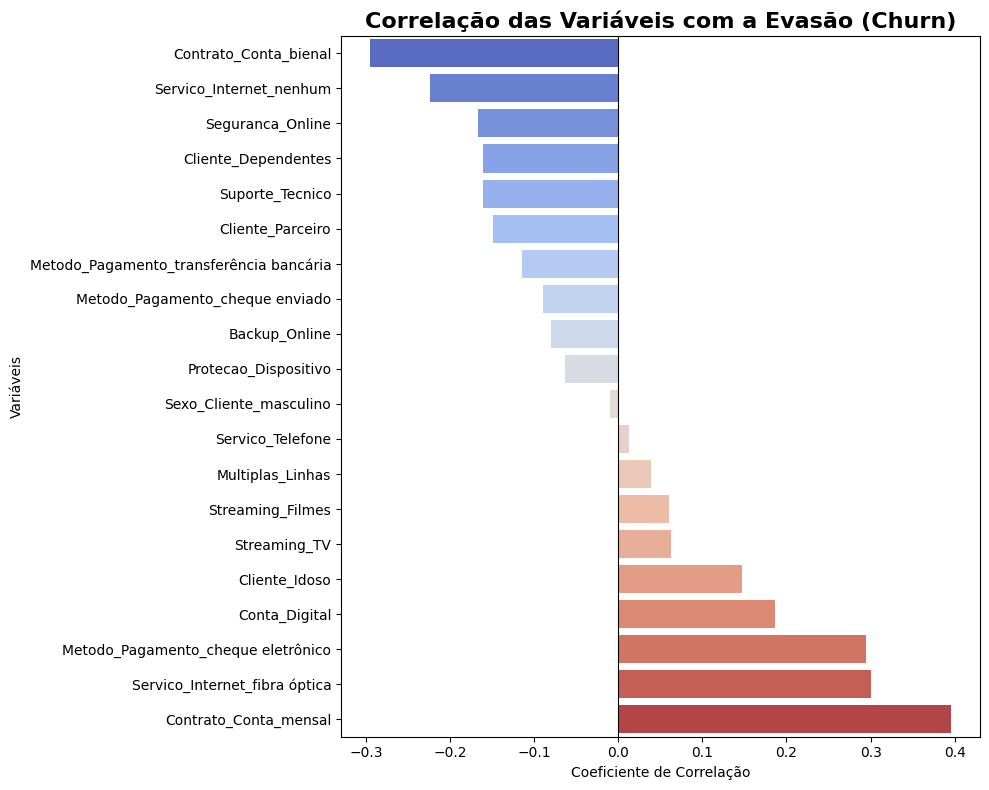

In [169]:
correlacoes_df = correlacoes.reset_index()
correlacoes_df.columns = ['Variavel', 'Correlacao']

plt.figure(figsize=(10, 8))
sns.barplot(
    data=correlacoes_df,
    x='Correlacao',
    y='Variavel',
    hue='Variavel',
    dodge=False,
    palette='coolwarm',
    legend=False
)

plt.title('Correla√ß√£o das Vari√°veis com a Evas√£o (Churn)', fontsize=16, weight='bold')
plt.xlabel('Coeficiente de Correla√ß√£o')
plt.ylabel('Vari√°veis')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

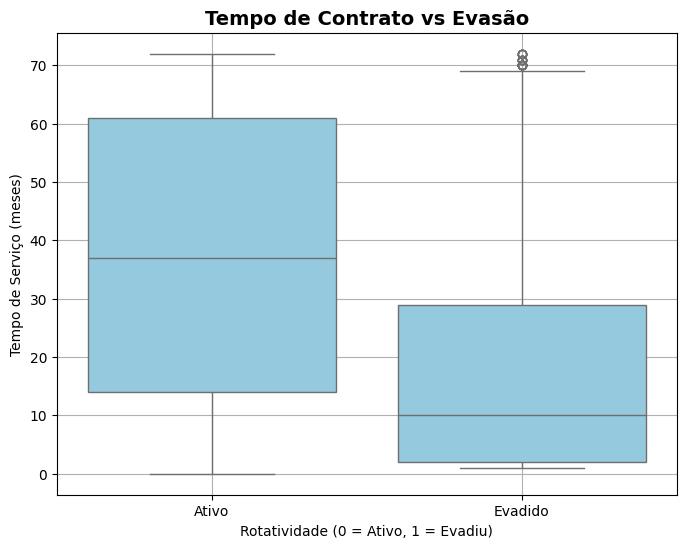

In [170]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rotatividade', y='Tempo_Servico', data=df, color='skyblue')
plt.title('Tempo de Contrato vs Evas√£o', fontsize=14, weight='bold')
plt.xlabel('Rotatividade (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Tempo de Servi√ßo (meses)')
plt.xticks([0,1], ['Ativo', 'Evadido'])
plt.grid(True)
plt.show()


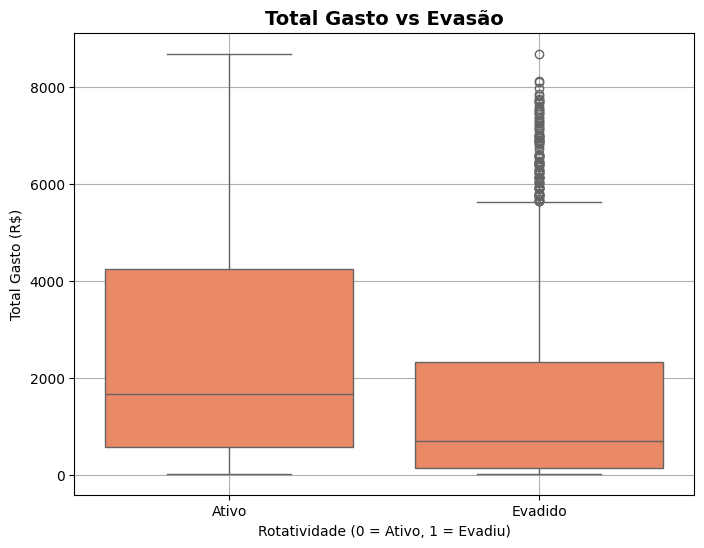

In [171]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rotatividade', y='Encargos_Totais', data=df, color='coral')
plt.title('Total Gasto vs Evas√£o', fontsize=14, weight='bold')
plt.xlabel('Rotatividade (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Total Gasto (R$)')
plt.xticks([0,1], ['Ativo', 'Evadido'])
plt.grid(True)
plt.show()


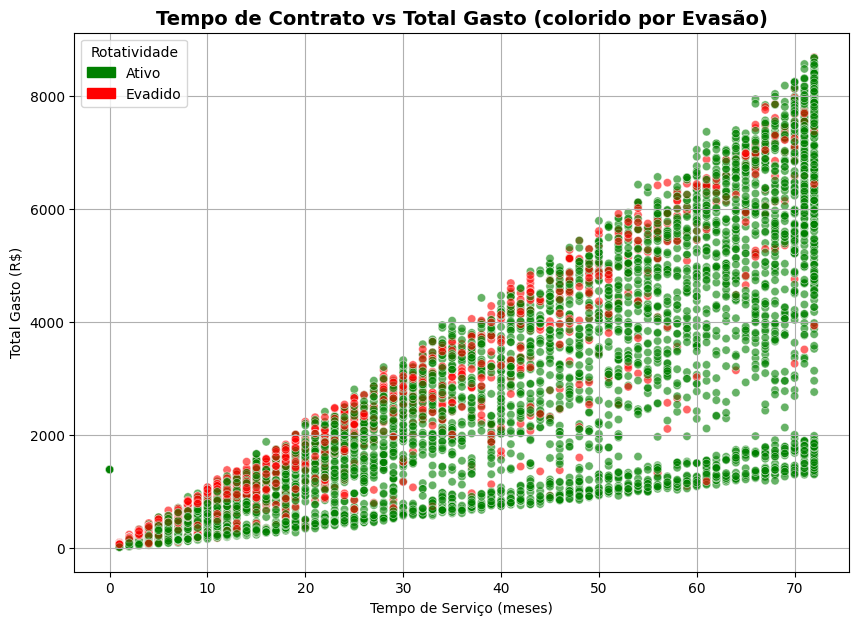

In [172]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='Tempo_Servico',
    y='Encargos_Totais',
    hue='Rotatividade',
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)

ativo_patch = mpatches.Patch(color='green', label='Ativo')
evadido_patch = mpatches.Patch(color='red', label='Evadido')

plt.legend(handles=[ativo_patch, evadido_patch], title='Rotatividade')
plt.title('Tempo de Contrato vs Total Gasto (colorido por Evas√£o)', fontsize=14, weight='bold')
plt.xlabel('Tempo de Servi√ßo (meses)')
plt.ylabel('Total Gasto (R$)')
plt.grid(True)
plt.show()


**Separa√ß√£o de Dados**

In [173]:
from sklearn.model_selection import train_test_split

X = df.drop('Rotatividade', axis=1)
y = df['Rotatividade']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamanho treino: {X_train.shape[0]} amostras")
print(f"Tamanho teste: {X_test.shape[0]} amostras")


Tamanho treino: 5086 amostras
Tamanho teste: 2181 amostras


**Cria√ß√£o de Modelos**

**Modelo 1: Regress√£o Log√≠stica (precisa de normaliza√ß√£o)**

Por qu√™?
Reg. Log√≠stica √© um modelo linear que funciona melhor com vari√°veis na mesma escala. Se os dados tiverem valores em escalas muito diferentes (ex: tempo em meses, gastos em reais), ele pode ficar ‚Äúviciado‚Äù em vari√°veis de maior magnitude.

Ent√£o:
Fazemos a normaliza√ß√£o (padroniza√ß√£o com StandardScaler) para deixar tudo na mesma r√©gua (m√©dia 0, desvio 1).


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Pipeline com normaliza√ß√£o + regress√£o log√≠stica
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Treina
pipe_lr.fit(X_train, y_train)

# Previs√£o
y_pred_lr = pipe_lr.predict(X_test)

# Avalia√ß√£o
print("Relat√≥rio Regress√£o Log√≠stica:\n")
print(classification_report(y_test, y_pred_lr))


Relat√≥rio Regress√£o Log√≠stica:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1620
           1       0.64      0.54      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.72      0.73      2181
weighted avg       0.79      0.80      0.80      2181



**Modelo 2: Random Forest (n√£o precisa de normaliza√ß√£o)**

Por qu√™?
√Årvores de decis√£o e ensembles como Random Forest s√£o baseados em regras de divis√£o dos dados, n√£o em dist√¢ncias ou gradientes sens√≠veis a escala.
Ou seja, n√£o importa se uma vari√°vel varia entre 0 e 1 milh√£o, o modelo vai analisar cortes e separa√ß√µes independentemente da escala.



In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Modelo direto, sem normaliza√ß√£o
rf = RandomForestClassifier(random_state=42)

# Treina
rf.fit(X_train, y_train)

# Previs√£o
y_pred_rf = rf.predict(X_test)

# Avalia√ß√£o
print("Relat√≥rio Random Forest:\n")
print(classification_report(y_test, y_pred_rf))


Relat√≥rio Random Forest:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1620
           1       0.61      0.48      0.53       561

    accuracy                           0.79      2181
   macro avg       0.72      0.69      0.70      2181
weighted avg       0.77      0.79      0.78      2181



In [176]:
from imblearn.over_sampling import SMOTE

# Cria o objeto SMOTE
smote = SMOTE(random_state=42)

# Aplica SMOTE s√≥ no treino
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checar o balanceamento p√≥s-SMOTE
print("Antes:", y_train.value_counts())
print("Depois:", y_train_smote.value_counts())


Antes: Rotatividade
0    3778
1    1308
Name: count, dtype: int64
Depois: Rotatividade
0    3778
1    3778
Name: count, dtype: int64


In [177]:
# Exemplo com Regress√£o Log√≠stica

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe_lr_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

pipe_lr_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = pipe_lr_smote.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1620
           1       0.54      0.64      0.58       561

    accuracy                           0.77      2181
   macro avg       0.70      0.72      0.71      2181
weighted avg       0.78      0.77      0.77      2181



In [178]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Aplica SMOTE s√≥ no treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribui√ß√£o original do treino:")
print(y_train.value_counts())
print("\nDistribui√ß√£o ap√≥s SMOTE:")
print(y_train_smote.value_counts())

# 2. Treina Random Forest com os dados balanceados
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# 3. Faz a previs√£o no conjunto de teste (sem SMOTE)
y_pred_rf_smote = rf_smote.predict(X_test)

# 4. Avalia o modelo
print("Relat√≥rio Random Forest com SMOTE:\n")
print(classification_report(y_test, y_pred_rf_smote))


Distribui√ß√£o original do treino:
Rotatividade
0    3778
1    1308
Name: count, dtype: int64

Distribui√ß√£o ap√≥s SMOTE:
Rotatividade
0    3778
1    3778
Name: count, dtype: int64
Relat√≥rio Random Forest com SMOTE:

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1620
           1       0.53      0.58      0.56       561

    accuracy                           0.76      2181
   macro avg       0.69      0.70      0.70      2181
weighted avg       0.77      0.76      0.76      2181



**Avalia√ß√£o dos Modelos**

=== Avalia√ß√£o do modelo: Regress√£o Log√≠stica com SMOTE ===
Acur√°cia: 0.7662
Precis√£o: 0.5382
Recall: 0.6399
F1-score: 0.5847
Matriz de Confus√£o:
[[1312  308]
 [ 202  359]]


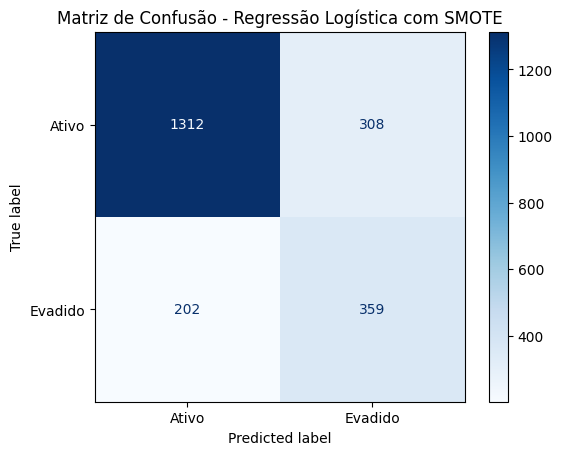

=== Avalia√ß√£o do modelo: Random Forest com SMOTE ===
Acur√°cia: 0.7616
Precis√£o: 0.5337
Recall: 0.5793
F1-score: 0.5556
Matriz de Confus√£o:
[[1336  284]
 [ 236  325]]


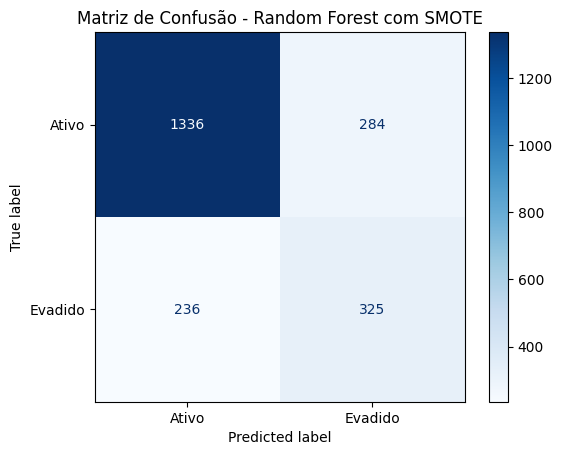

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def avaliar_modelo(modelo, X_teste, y_teste, nome_modelo):
    y_pred = modelo.predict(X_teste)

    acc = accuracy_score(y_teste, y_pred)
    prec = precision_score(y_teste, y_pred)
    rec = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)

    print(f"=== Avalia√ß√£o do modelo: {nome_modelo} ===")
    print(f"Acur√°cia: {acc:.4f}")
    print(f"Precis√£o: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de Confus√£o:")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadido'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confus√£o - {nome_modelo}')
    plt.show()

# Avaliar Regress√£o Log√≠stica (com SMOTE, pipeline)
avaliar_modelo(pipe_lr_smote, X_test, y_test, "Regress√£o Log√≠stica com SMOTE")

# Avaliar Random Forest (com SMOTE)
avaliar_modelo(rf_smote, X_test, y_test, "Random Forest com SMOTE")


**Ajustar hiperpar√¢metros (Grid Search)**

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline com scaler e regress√£o
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Grade de par√¢metros para testar
param_grid_lr = {
    'logreg__C': [0.01, 0.1, 1, 10],          # for√ßa da regulariza√ß√£o
    'logreg__penalty': ['l2'],                 # tipo de regulariza√ß√£o
    'logreg__solver': ['lbfgs']                # otimizador
}

grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train_smote, y_train_smote)

print("Melhores par√¢metros Regress√£o Log√≠stica:", grid_search_lr.best_params_)
print("Melhor F1-score Regress√£o Log√≠stica:", grid_search_lr.best_score_)

# Modelo ajustado com os melhores par√¢metros
best_lr = grid_search_lr.best_estimator_
best_lr.fit(X_train_smote, y_train_smote)


Melhores par√¢metros Regress√£o Log√≠stica: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Melhor F1-score Regress√£o Log√≠stica: 0.797999361574184


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)

print("Melhores par√¢metros Random Forest:", grid_search_rf.best_params_)
print("Melhor F1-score Random Forest:", grid_search_rf.best_score_)

# Modelo ajustado com os melhores par√¢metros
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_smote, y_train_smote)


Melhores par√¢metros Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Melhor F1-score Random Forest: 0.8281306868199877


RandomForestClassifier(min_samples_leaf=2, random_state=42)

=== Avalia√ß√£o do modelo: Regress√£o Log√≠stica Ajustada com SMOTE ===
Acur√°cia: 0.7611
Precis√£o: 0.5287
Recall: 0.6578
F1-score: 0.5862
Matriz de Confus√£o:
[[1291  329]
 [ 192  369]]


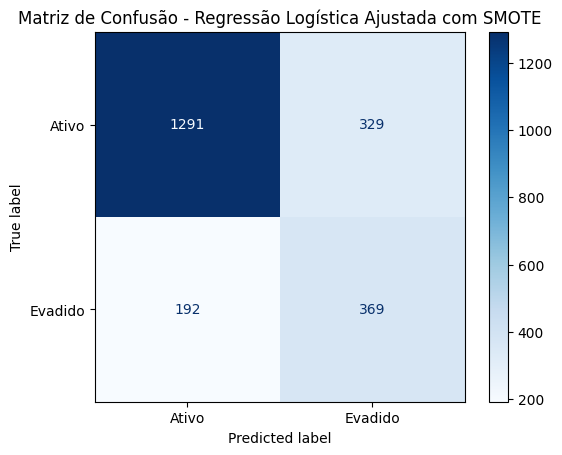

=== Avalia√ß√£o do modelo: Random Forest Ajustada com SMOTE ===
Acur√°cia: 0.7652
Precis√£o: 0.5375
Recall: 0.6257
F1-score: 0.5783
Matriz de Confus√£o:
[[1318  302]
 [ 210  351]]


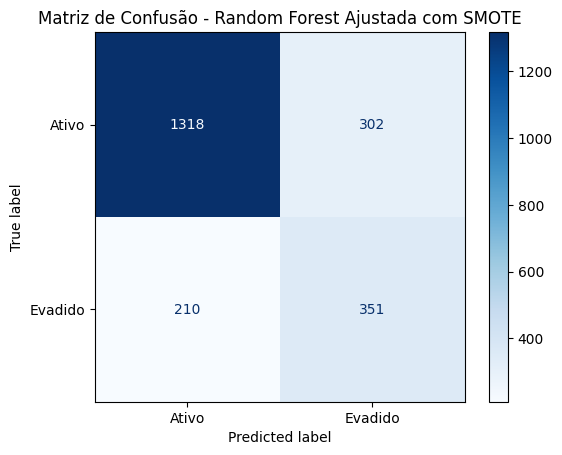

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def avaliar_modelo(modelo, X_teste, y_teste, nome_modelo):
    y_pred = modelo.predict(X_teste)

    acc = accuracy_score(y_teste, y_pred)
    prec = precision_score(y_teste, y_pred)
    rec = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)

    print(f"=== Avalia√ß√£o do modelo: {nome_modelo} ===")
    print(f"Acur√°cia: {acc:.4f}")
    print(f"Precis√£o: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de Confus√£o:")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadido'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confus√£o - {nome_modelo}')
    plt.show()

# Avalia os modelos ajustados
avaliar_modelo(best_lr, X_test, y_test, "Regress√£o Log√≠stica Ajustada com SMOTE")
avaliar_modelo(best_rf, X_test, y_test, "Random Forest Ajustada com SMOTE")


**An√°lise de Import√¢ncia das Vari√°veis**

Regress√£o Log√≠stica:

In [183]:
# Pega o modelo dentro do pipeline
model = best_lr.named_steps['logreg']

# Pega os nomes das features (colunas) ‚Äî lembrando que o scaler n√£o muda nomes
features = X_train.columns

# Coeficientes
coef = model.coef_[0]

# Cria dataframe com nome e coeficiente, ordenado
coef_df = pd.DataFrame({
    'Vari√°vel': features,
    'Coeficiente': coef
}).sort_values(by='Coeficiente', ascending=False)

print(coef_df)


                                   Vari√°vel  Coeficiente
13                         Encargos_Mensais     2.992537
14                          Encargos_Totais     1.183499
18                  Servico_Internet_nenhum     0.635373
15                           Contas_Diarias     0.165391
20                    Contrato_Conta_mensal     0.127137
12                            Conta_Digital     0.025726
0                             Cliente_Idoso    -0.092755
1                          Cliente_Parceiro    -0.129657
16                   Sexo_Cliente_masculino    -0.175931
2                       Cliente_Dependentes    -0.249598
21       Metodo_Pagamento_cheque eletr√¥nico    -0.252979
5                          Multiplas_Linhas    -0.274341
8                      Protecao_Dispositivo    -0.395770
23  Metodo_Pagamento_transfer√™ncia banc√°ria    -0.404608
22          Metodo_Pagamento_cheque enviado    -0.404649
19                    Contrato_Conta_bienal    -0.409669
11                         

Random Forest:

                                   Vari√°vel  Import√¢ncia
3                             Tempo_Servico     0.131130
14                          Encargos_Totais     0.124968
13                         Encargos_Mensais     0.112102
19                    Contrato_Conta_bienal     0.068353
20                    Contrato_Conta_mensal     0.067916
9                           Suporte_Tecnico     0.056711
6                          Seguranca_Online     0.051523
2                       Cliente_Dependentes     0.041449
17            Servico_Internet_fibra √≥ptica     0.041320
1                          Cliente_Parceiro     0.032720
18                  Servico_Internet_nenhum     0.030255
7                             Backup_Online     0.027954
23  Metodo_Pagamento_transfer√™ncia banc√°ria     0.027741
15                           Contas_Diarias     0.027116
22          Metodo_Pagamento_cheque enviado     0.026087
16                   Sexo_Cliente_masculino     0.024745
8                      Pro

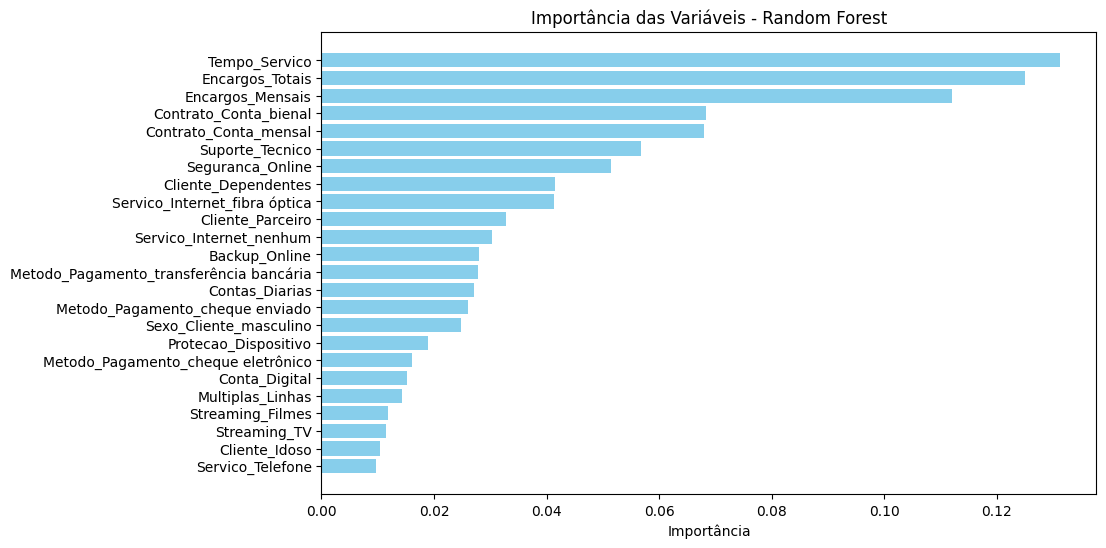

In [184]:
# Pega import√¢ncia das features
importancia = best_rf.feature_importances_

# Nomes das features
features = X_train.columns

# Cria DataFrame ordenado
df_importancia = pd.DataFrame({
    'Vari√°vel': features,
    'Import√¢ncia': importancia
}).sort_values(by='Import√¢ncia', ascending=False)

print(df_importancia)

# Gr√°fico pra visualizar
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Vari√°vel'], df_importancia['Import√¢ncia'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Import√¢ncia das Vari√°veis - Random Forest')
plt.xlabel('Import√¢ncia')
plt.show()


**Conclus√£o**

# üìä Relat√≥rio Anal√≠tico sobre Evas√£o de Clientes

## 1. Introdu√ß√£o

Este relat√≥rio tem como objetivo identificar os principais fatores associados √† evas√£o de clientes e propor estrat√©gias concretas de reten√ß√£o. Utilizando os modelos **Regress√£o Log√≠stica** e **Random Forest**, ambos ajustados com **SMOTE** para balanceamento das classes, exploramos as vari√°veis mais relevantes para a previs√£o de churn e seus impactos na decis√£o dos clientes.

---

## 2. Avalia√ß√£o dos Modelos

Ambos os modelos foram avaliados com as m√©tricas padr√£o de classifica√ß√£o:

| Modelo               | Acur√°cia | Precis√£o | Recall | F1-score |
|---------------------|----------|----------|--------|----------|
| Regress√£o Log√≠stica | 0.7611   | 0.5287   | 0.6578 | 0.5862   |
| Random Forest       | 0.7652   | 0.5375   | 0.6257 | 0.5783   |

**An√°lise:**  
- A **Regress√£o Log√≠stica** se destaca em **recall**, o que √© essencial em problemas de churn, pois o foco √© identificar corretamente os clientes que ir√£o sair.
- A **Random Forest** oferece um pequeno ganho em acur√°cia geral, mas com menor sensibilidade.

---

## 3. Fatores que Influenciam a Evas√£o

### 3.1 Regress√£o Log√≠stica ‚Äì Coeficientes

Os coeficientes da regress√£o indicam a influ√™ncia de cada vari√°vel na probabilidade de churn.

**Vari√°veis com maior impacto positivo (aumentam chance de evas√£o):**
- `Encargos_Mensais` (**+2.99**)
- `Encargos_Totais` (**+1.18**)
- `Servico_Internet_nenhum` (**+0.63**)
- `Contas_Diarias` (**+0.16**)
- `Contrato_Conta_mensal` (**+0.12**)

**Vari√°veis com impacto negativo (reduzem a chance de evas√£o):**
- `Tempo_Servico` (**-1.62**)
- `Servico_Internet_fibra √≥ptica` (**-0.99**)
- `Servico_Telefone`, `Suporte_Tecnico`, `Seguranca_Online` (valores entre -0.5 e -0.8)
- `Cliente_Dependentes`, `Cliente_Parceiro` (relacionamentos reduzem a evas√£o)

---

### 3.2 Random Forest ‚Äì Import√¢ncia das Vari√°veis

A import√¢ncia das vari√°veis √© baseada na redu√ß√£o de impureza das √°rvores de decis√£o.

**Vari√°veis mais importantes:**
1. `Tempo_Servico` ‚Äì **13.1%**
2. `Encargos_Totais` ‚Äì **12.4%**
3. `Encargos_Mensais` ‚Äì **11.2%**
4. `Contrato_Conta_bienal` ‚Äì **6.8%**
5. `Contrato_Conta_mensal` ‚Äì **6.7%**
6. `Suporte_Tecnico`, `Seguranca_Online`, `Fibra √ìptica` ‚Äì totalizam **~15%**

---

## 4. Estrat√©gias de Reten√ß√£o

### üìâ 1. Redu√ß√£o da Percep√ß√£o de Custo
- Reestruturar planos com maior transpar√™ncia.
- Oferecer descontos progressivos com base no tempo de fidelidade.
- Criar pacotes com servi√ßos b√¥nus (streaming, prote√ß√£o digital).

### ü§ù 2. Est√≠mulo √† Fideliza√ß√£o
- Oferecer b√¥nus por renova√ß√£o de contratos anuais/bienais.
- Programas de fidelidade e cashback para clientes antigos.

### üì° 3. Valoriza√ß√£o da Qualidade do Servi√ßo
- Investir em infraestrutura de **fibra √≥ptica**.
- Fortalecer canais de **suporte t√©cnico** e atendimento.
- Oferecer pacotes integrados de **streaming**, **seguran√ßa digital** e **backup**.

### üë®‚Äçüë©‚Äçüëß‚Äçüë¶ 4. Personaliza√ß√£o para Clientes Familiares
- Pacotes para m√∫ltiplas linhas com descontos progressivos.
- Planos familiares com benef√≠cios conjuntos.

### üí° 5. Acompanhamento Proativo de Novos Clientes
- Interven√ß√µes no primeiro m√™s com ofertas especiais e onboarding personalizado.
- Monitoramento via **NPS**, SAC e intera√ß√µes digitais.

---

## 5. Conclus√£o

A evas√£o de clientes √© fortemente influenciada por fatores financeiros, percep√ß√£o de qualidade e tipo de contrato. O cruzamento entre os modelos aponta para uma converg√™ncia clara: **clientes que pagam mais e recebem menos tendem a sair**. J√° aqueles com contratos longos, bons servi√ßos e apoio t√©cnico permanecem.

> **"Entender por que os clientes v√£o embora √© o primeiro passo para faz√™-los ficar."**

---
